# ASSIGNMENT #3 - ATMOSPHERIC SOUNDINGS #
Due: 04 March 2023 @ 11:59p

Purpose:\
The purpose of this assignment is to continue to strengthen skills with reading in data and begin to familiarize with plotting data on standard plots, skew-t log-p diagrams and hodographs.

Overview:\
In this assignment you will read in atmospheric sounding data and plot that data using several methods.


| | UPDATE TO YOUR INFORMATION | 
| :- | :- |
| Created By | Jared W. Marquis |
| Creation Date | 17 January 2024 |
| Course | ATSC 270 - Computer Concepts in Meteorology |

In [1]:
### UPDATE TO YOUR INFORMATION ###
#information allowing anyone with the code to print the author and contact information
__author__    = "Jared W. Marquis"
__contact__   = "jared.marquis@und.edu"

### IMPORT REQUIRED LIBRARIES ###

In [2]:
import numpy as np
import metpy.calc as mpcalc
from metpy.units import units
from metpy.plots import Hodograph, SkewT
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

### OPEN SOUNDING CSV FILE ###
Open the CSV file you created last lab.  Make sure to copy it into this directory.

In [3]:

data = pd.read_csv('KBIS_sounding.csv',delimiter=',',skiprows=1)
print(data)

    pressure[mb]  height[m]  temperature[degC]  dewpoint[degC]  u-wind[m/s]  \
0         1000.0      355.0                NaN             NaN          NaN   
1          959.0      649.0              -25.3           -28.8          NaN   
2          949.0      726.0              -24.1           -27.6          NaN   
3          936.0      826.0              -22.7           -28.7          NaN   
4          925.0      915.0              -22.9           -28.9         2.98   
5          898.0     1131.0              -22.9           -28.9          NaN   
6          851.0     1526.0              -21.3           -35.3          NaN   
7          850.0     1536.0              -21.3           -35.3         2.57   
8          763.0     2328.0              -22.5           -40.5          NaN   
9          730.0     2651.0              -24.1           -41.1          NaN   
10         721.0     2741.0              -23.1           -41.1          NaN   
11         707.0     2884.0              -22.9      

### EXTRACT VARIABLES AND ADD UNITS ###
make sure winds are converted to knots

In [4]:
#grabs the first line which is the title of the data
title = open("../assignment_2/KBIS_sounding.csv","r").readlines()[0]
#grab each variable and add units
pressure = data['pressure[mb]'] * units('millibars')
hight = data['height[m]'] * units('meters')
temp = data['temperature[degC]'] * units.degC
dew = data['dewpoint[degC]'] * units.degC
uwind = data['u-wind[m/s]'] * units('m/s').to(units('knots'))
vwind = data['v-wind[m/s]'] * units('m/s').to(units('knots'))
print(vwind)

0            NaN
1            NaN
2            NaN
3            NaN
4      -1.555076
5            NaN
6            NaN
7      -8.669546
8            NaN
9            NaN
10           NaN
11           NaN
12    -32.617711
13           NaN
14           NaN
15    -66.168467
16           NaN
17           NaN
18           NaN
19   -105.239741
20   -120.732181
21           NaN
22   -109.943844
23           NaN
24           NaN
25           NaN
26    -89.727862
27           NaN
28           NaN
29           NaN
30           NaN
31           NaN
32           NaN
33    -94.917927
34           NaN
35           NaN
36           NaN
37           NaN
38           NaN
39    -72.077754
40           NaN
41           NaN
42    -68.598272
43           NaN
44           NaN
45           NaN
46    -82.730022
47           NaN
48    -81.311015
49    -78.492441
50           NaN
Name: v-wind[m/s], dtype: float64


### PLOT TEMPERATURE & DEWPOINT VS HEIGHT ###

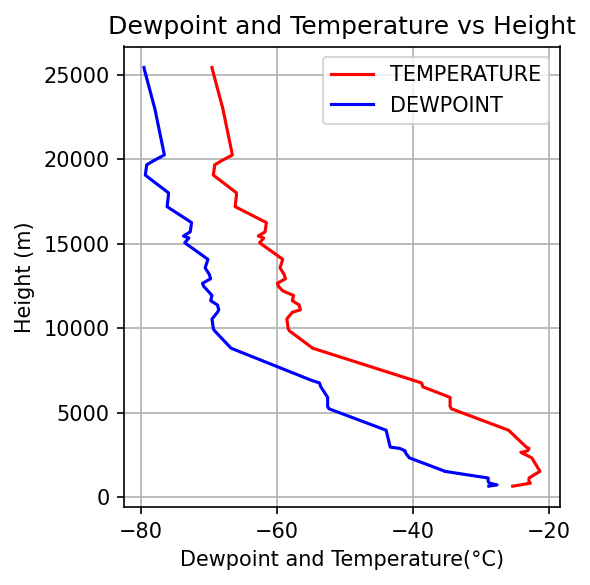

In [9]:
#create a figure (4 x 4 *figsize) dpi = 150
fig = plt.figure(figsize =(4, 4),dpi=150)
#create subplot
plot1 = plt.subplot(1,1,1)
#plot temperature on the x-axis, height on the y-axis in red
plt.plot(temp, hight,color='red',label='TEMPERATURE')

#give it the label of TEMPERATURE
plot1.set_ylabel('Height (m)')

#plot dewpoint in blue
#give it the label of DEWPOINT\N
plot1.set_xlabel('Dewpoint and Temperature(\N{DEGREE SIGN}C)')
plt.plot(dew, hight,color='blue',label="DEWPOINT")
plt.title('Dewpoint and Temperature vs Height')

#add a background grid
plt.grid()

#add a x label with units (including the degree symbol) - google it and figure it out :)

#add a y label with units 

#add a legend
plt.legend()
#this is added to make sure labels don't get cut off
fig.tight_layout()
#save the figure as temp_dwpt.png
plt.savefig('temp_dwpt.png')

While this is nice, it's not particularly useful to us for analyzing the current weather or making a forecast.

For that, we typically examine Skew-T Log-P diagrams.  For this, we will be following a modified version of the "Skew-T with Complex Layout" example on MetPy's website (https://unidata.github.io/MetPy/latest/examples/plots/Skew-T_Layout.html)

### PLOT DATA ON SKEW-T ###

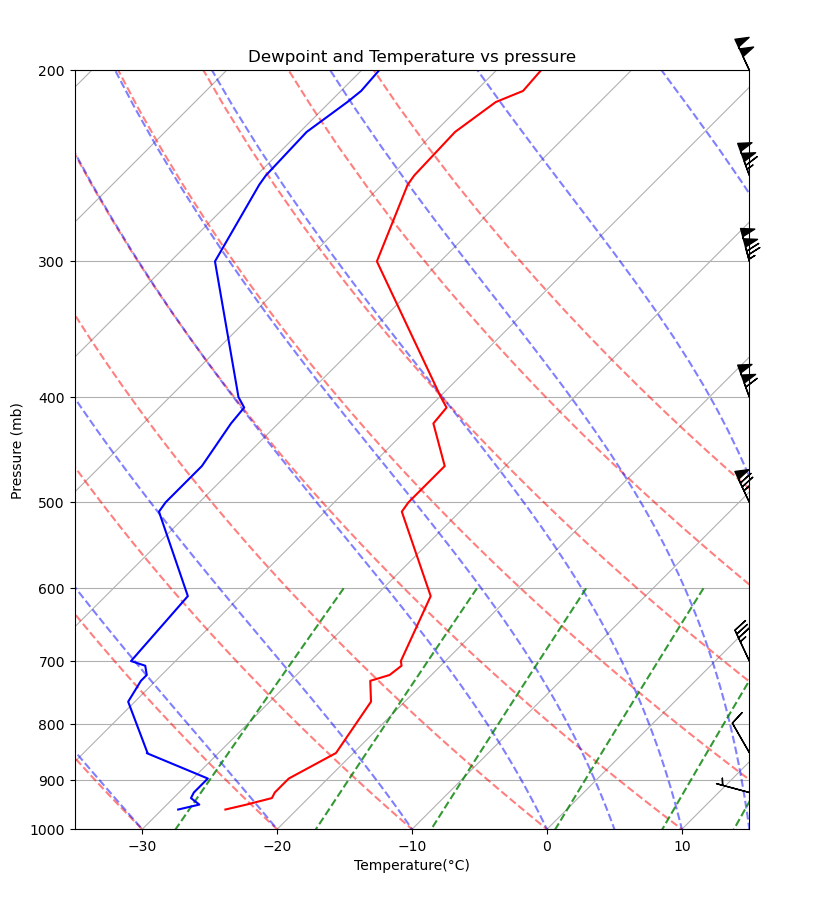

In [6]:
#create a figure and give it a figsize of 9x9, with a dpi of 100
fig = plt.figure(figsize =(9, 9),dpi=100)
#create Skew-T
skew = SkewT(fig,rotation=45)

#add dry adiabats
skew.plot_dry_adiabats()
#add moist adiabats
skew.plot_moist_adiabats()
#add mixing ratio lines
skew.plot_mixing_lines()

#add axis labels with units
plt.xlabel('Temperature(\N{DEGREE SIGN}C)')
#add a y label with units 
plt.ylabel('Pressure (mb)')
plt.title('Dewpoint and Temperature vs pressure')

#add temperature in red
skew.plot(pressure, temp,color='red')
#add dewpoint in blue
skew.plot(pressure, dew,color='blue')

#plot wind barbs
skew.plot_barbs(pressure, uwind, vwind)

#set x-axis limits that look good (use your eyes)
skew.ax.set_xlim(-35, 15)
#set y-axis limits that include the tropopause but not a ton of the stratosphere
skew.ax.set_ylim(1000, 200)
#to make sure everything looks okay
fig.tight_layout()

#save the skew T as skewT.png
plt.savefig('skewT.png')

### PLOT HODOGRAPH ###
The plot will not look correct if you do not remove NaNs

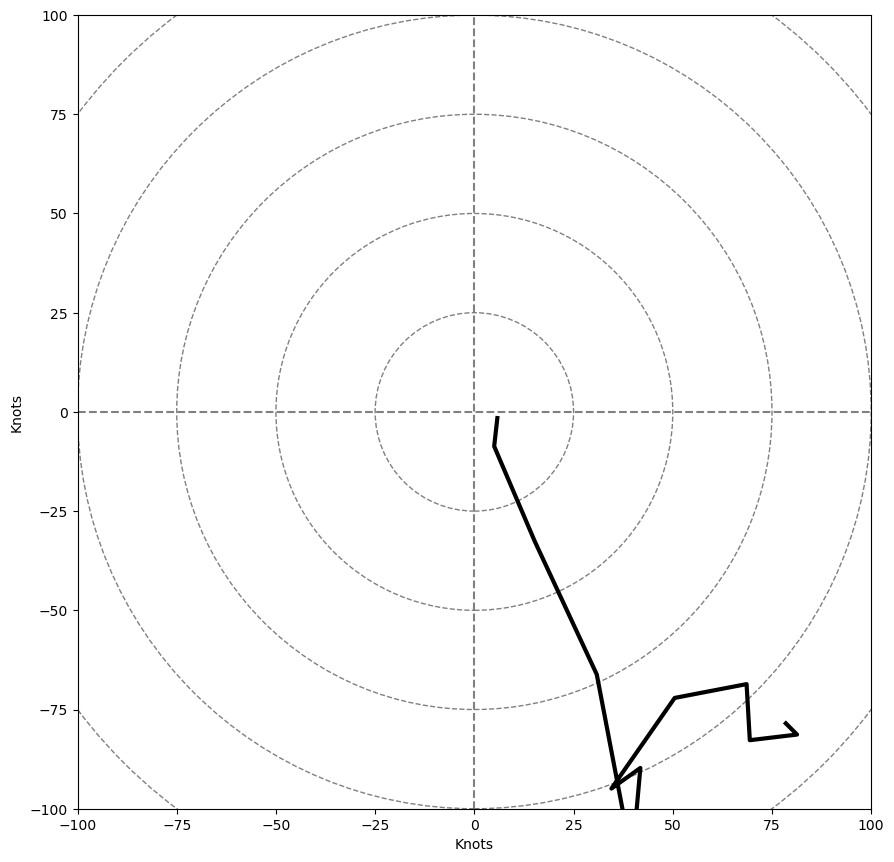

In [7]:
fig = plt.figure(figsize =(9, 9),dpi=100)
#remove nans from u and v
u_hodo = uwind.dropna()
v_hodo = vwind.dropna()

#create the hodograph (have the range from 0-100kts with 25kt increment)
ax = fig.add_subplot(1,1,1)
h = Hodograph(ax, component_range=100.)
h.add_grid(increment=25)
h.plot(u_hodo, v_hodo,color='black')
#make the wind curve black

#add x and y labels
plt.xlabel('Knots')
plt.ylabel('Knots')
#to make sure everything looks okay
fig.tight_layout()

#save figure as hodo.png
plt.savefig('hodo.png')

### PLOT SKEW-T & HODOGRAPH ON SAME FIGURE ###

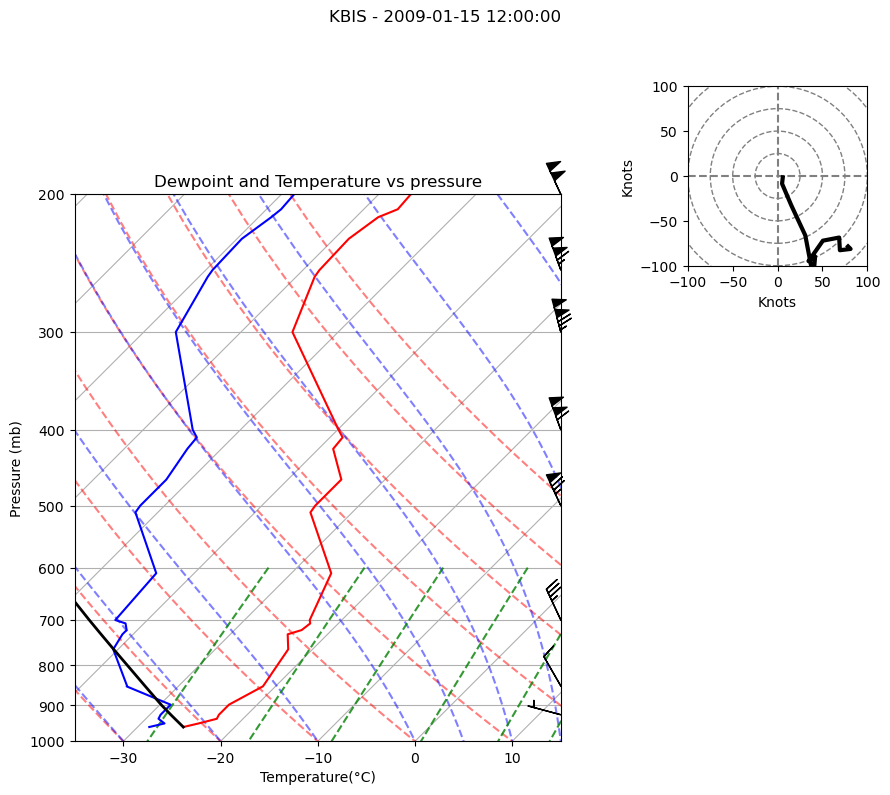

In [24]:
fig = plt.figure(figsize=(9,9),dpi=100)

gs = gridspec.GridSpec(3,3)
skew = SkewT(fig, rotation=45, subplot=gs[:,:2])

#add dry adiabats
skew.plot_dry_adiabats()
#add moist adiabats
skew.plot_moist_adiabats()
#add mixing ratio lines
skew.plot_mixing_lines()


#add axis labels with units
plt.xlabel('Temperature(\N{DEGREE SIGN}C)')
#add a y label with units 
plt.ylabel('Pressure (mb)')
plt.title('Dewpoint and Temperature vs pressure')


#add temperature in red
skew.plot(pressure, temp,color='red')
#add dewpoint in blue
skew.plot(pressure, dew,color='blue')

#plot wind barbs
skew.plot_barbs(pressure, uwind, vwind)

#set x-axis limits that look good (use your eyes)
skew.ax.set_xlim(-35, 15)
#set y-axis limits that include the tropopause but not a ton of the stratosphere
skew.ax.set_ylim(1000, 200)

#add a hodograph
ax = fig.add_subplot(gs[0,-1])

u_hodo = uwind.dropna()
v_hodo = vwind.dropna()

h = Hodograph(ax, component_range=100.)
h.add_grid(increment=25)
h.plot(u_hodo, v_hodo,color='black')
#make the wind curve black

#parcel line

prof = mpcalc.parcel_profile(pressure.values[1:]*units.hPa, temp[1]*units.degC, dew[1]*units.degC)
skew.plot(pressure[1:], prof, 'k', linewidth=2)

#add x and y labels
plt.xlabel('Knots')
plt.ylabel('Knots')

#add a title with the date and launch location:
plt.suptitle(title)

#to make sure everything looks okay
fig.tight_layout()

#save the figure as skew_hodo.png
